In [2]:
# 1. IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
# 2. LOAD DATA
df = pd.read_csv("C:/Users/hp/Desktop/ML PROJECTS FOLDER/SENTIMENT ANALYSIS PROJECT/Tweets.csv")
df.shape

(14640, 15)

In [5]:
#view sample
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#CHECK FOR MISSING VALUES
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
#Drop missing Values
df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_14240\1100267640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='Set2')


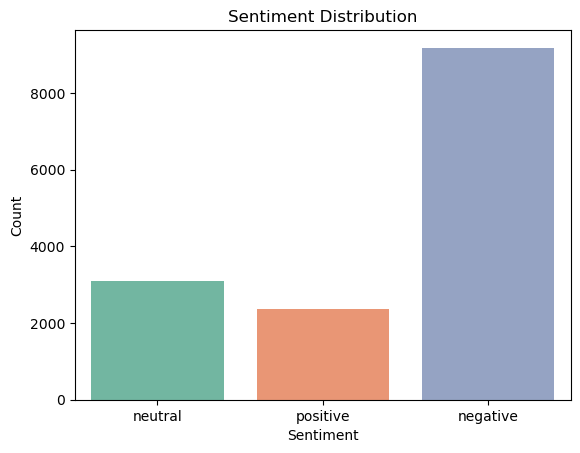

In [9]:
#SENTIMENT DISTRIBUTION
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [10]:
#CLEAN THE TEXT
stop_words = set(stopwords.words('english'))
 # Remove mentions
def clean_text(text):
    text = re.sub(r'@\w+', '', text) 
    # Remove URLs
    text = re.sub(r'http\S+', '', text) 
    # Remove special chars and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()                            
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

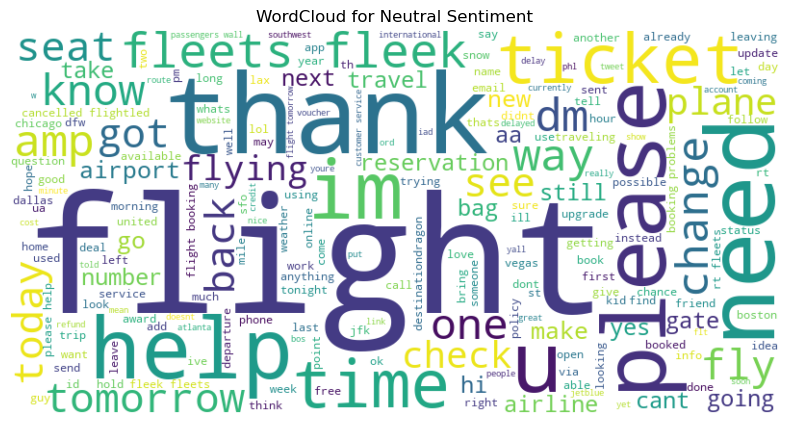

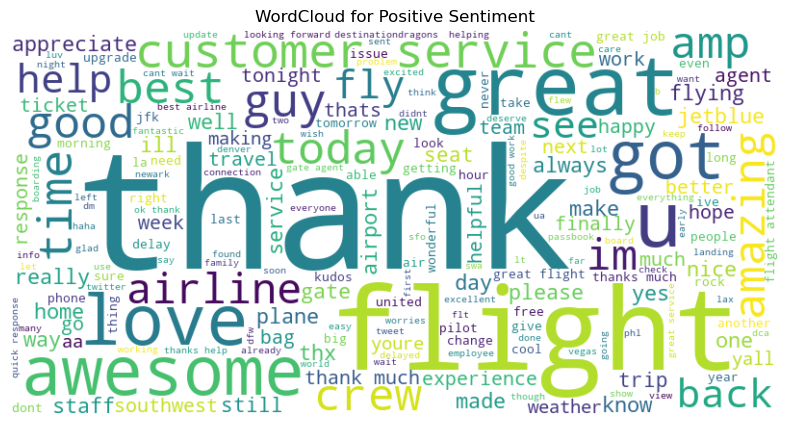

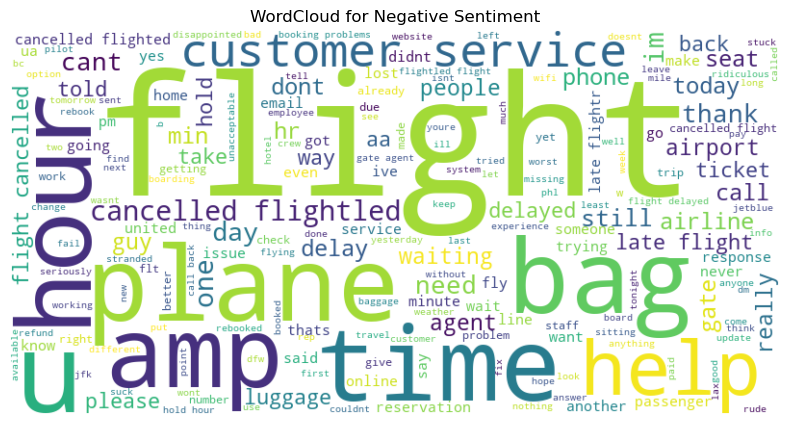

In [11]:
#WORDCLOUDS BY SENTIMENT
for sentiment in df['airline_sentiment'].unique():
    text = " ".join(review for review in df[df['airline_sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for {sentiment.capitalize()} Sentiment")
    plt.axis('off')
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14240\4063328600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airline_sentiment', y='text_length', palette='pastel')


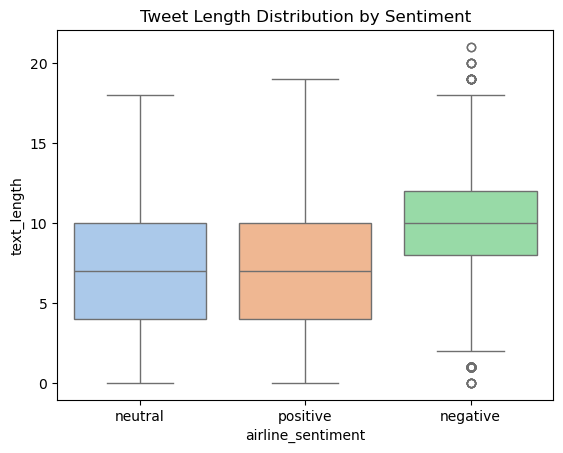

In [13]:
#TWEET LENGTH ANALYSIS
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

sns.boxplot(data=df, x='airline_sentiment', y='text_length', palette='pastel')
plt.title('Tweet Length Distribution by Sentiment')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14240\1096575179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index, palette='Set3')


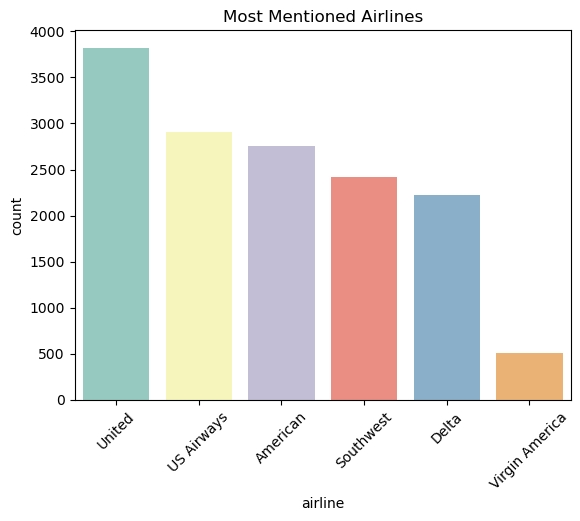

In [15]:
#MOST MENTIONED AIRLINES
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index, palette='Set3')
plt.title('Most Mentioned Airlines')
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14240\3261480439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_reasons.values, y=neg_reasons.index, palette='Reds_r')


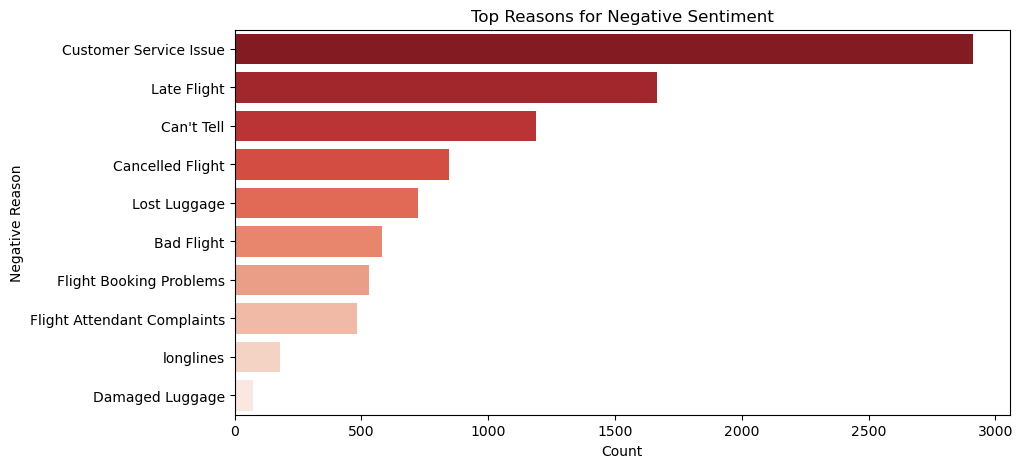

In [16]:
#NEGATIVE REASONS (optional insight)
neg_reasons = df[df['airline_sentiment'] == 'negative']['negativereason'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=neg_reasons.values, y=neg_reasons.index, palette='Reds_r')
plt.title('Top Reasons for Negative Sentiment')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()